In [1]:
import sys
assert sys.version_info >= (3, 5)
# Python ≥3.5 is required

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Task 11 Modules
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import BayesianGaussianMixture
from sklearn.metrics import accuracy_score

In [2]:
DOWNLOAD_ROOT = "http://www.macs.hw.ac.uk/%7Eek19/data/"
CURRENT_PATH = os.path.join(os.getcwd(), "datasets")
X_FILE = "x_train_gr_smpl.csv"
Y_FILE ="y_train_smpl.csv"

def fetch_data(download_root=DOWNLOAD_ROOT, current_path=CURRENT_PATH):
    if os.path.isfile(os.path.join(current_path, X_FILE)) or os.path.isfile(os.path.join(current_path, Y_FILE)):
        return
    
    os.makedirs(current_path, exist_ok=True)
    
    urllib.request.urlretrieve(download_root + X_FILE, os.path.join(current_path, X_FILE))
    urllib.request.urlretrieve(download_root + Y_FILE, os.path.join(current_path, Y_FILE))

In [3]:
fetch_data()

In [4]:
def load_features_data(current_path=CURRENT_PATH):
    return pd.read_csv(os.path.join(current_path, X_FILE))

def load_labels_data(current_path=CURRENT_PATH):
    return pd.read_csv(os.path.join(current_path, Y_FILE))

In [5]:
X = load_features_data()

In [6]:
signs_y = load_labels_data()

In [ ]:
# KMeans

In [23]:
accuracyValues = []
for i in range(1,16):
    kmeans = KMeans(n_clusters=i, random_state=42) 
    y_pred = kmeans.fit_predict(X)
    print("Cluster_count: " + str(i) + ". Accuracy: " + str(accuracy_score(signs_y, y_pred)))
    accuracyValues.append(accuracy_score(signs_y, y_pred))


Cluster_count: 1. Accuracy: 0.021671826625386997
Cluster_count: 2. Accuracy: 0.13529411764705881
Cluster_count: 3. Accuracy: 0.12559339525283797
Cluster_count: 4. Accuracy: 0.1608875128998968
Cluster_count: 5. Accuracy: 0.12043343653250774
Cluster_count: 6. Accuracy: 0.14200206398348814
Cluster_count: 7. Accuracy: 0.13374613003095975
Cluster_count: 8. Accuracy: 0.12321981424148606
Cluster_count: 9. Accuracy: 0.11651186790505676
Cluster_count: 10. Accuracy: 0.06160990712074303
Cluster_count: 11. Accuracy: 0.07038183694530444
Cluster_count: 12. Accuracy: 0.06687306501547988
Cluster_count: 13. Accuracy: 0.09267285861713107
Cluster_count: 14. Accuracy: 0.058617131062951494
Cluster_count: 15. Accuracy: 0.08802889576883385


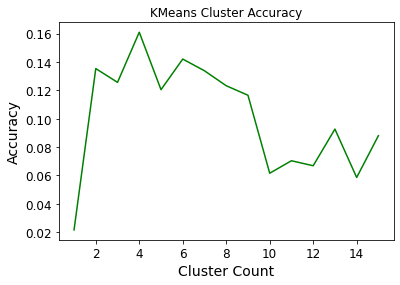

In [24]:
# Produce accuracy graph
x = np.arange(1, len(accuracyValues)+1) 

plt.title("KMeans Cluster Accuracy")  
plt.xlabel("Cluster Count")  
plt.ylabel("Accuracy")
plt.plot(x, accuracyValues, color ="green")  
plt.show()


In [ ]:
# INERTIA for KMeans

In [12]:
inertia = []
K = range(1,16)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertia.append(kmeanModel.inertia_)


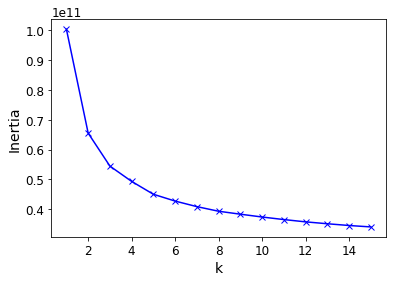

In [13]:
# Plot the elbow
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()


In [ ]:
#BayesianGaussianMixture

In [9]:
accuracyValues = []
for i in range(1,16):
    clf = mixture.BayesianGaussianMixture(n_components=i, covariance_type='full')
    y_pred = clf.fit_predict(X)
    print("Cluster_count: " + str(i) + ". Accuracy: " + str(accuracy_score(signs_y, y_pred)))
    accuracyValues.append(accuracy_score(signs_y, y_pred))

Cluster_count: 1. Accuracy: 0.021671826625386997
Cluster_count: 2. Accuracy: 0.13147574819401445
Cluster_count: 3. Accuracy: 0.1562435500515996
Cluster_count: 4. Accuracy: 0.09525283797729618
Cluster_count: 5. Accuracy: 0.17543859649122806
Cluster_count: 6. Accuracy: 0.10371517027863777
Cluster_count: 7. Accuracy: 0.1328173374613003
Cluster_count: 8. Accuracy: 0.10123839009287926
Cluster_count: 9. Accuracy: 0.06563467492260062
Cluster_count: 10. Accuracy: 0.1411764705882353
Cluster_count: 11. Accuracy: 0.07750257997936016
Cluster_count: 12. Accuracy: 0.0978328173374613
Cluster_count: 13. Accuracy: 0.08338493292053664
Cluster_count: 14. Accuracy: 0.05283797729618163
Cluster_count: 15. Accuracy: 0.07213622291021672


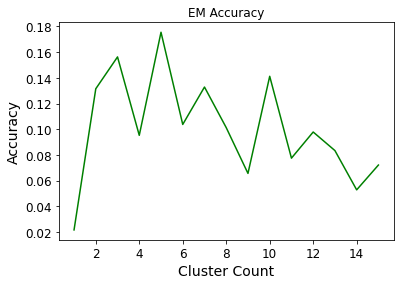

In [10]:
# Produce accuracy graph
x = np.arange(1, len(accuracyValues)+1)

plt.title("EM Accuracy")
plt.xlabel("Cluster Count")
plt.ylabel("Accuracy")
plt.plot(x, accuracyValues, color ="green")
plt.show()


In [ ]:
#AgglomerativeClustering

In [7]:

accuracyValues = []
for i in range(1,16):
    clustering = AgglomerativeClustering(n_clusters=i)
    y_pred = clustering.fit_predict(X)
    print("Cluster_count: " + str(i) + ". Accuracy: " + str(accuracy_score(signs_y, y_pred)))
    accuracyValues.append(accuracy_score(signs_y, y_pred))


Cluster_count: 1. Accuracy: 0.021671826625386997
Cluster_count: 2. Accuracy: 0.11393188854489164
Cluster_count: 3. Accuracy: 0.1691434468524252
Cluster_count: 4. Accuracy: 0.20144478844169247
Cluster_count: 5. Accuracy: 0.22156862745098038
Cluster_count: 6. Accuracy: 0.12022703818369453
Cluster_count: 7. Accuracy: 0.1545923632610939
Cluster_count: 8. Accuracy: 0.08792569659442724
Cluster_count: 9. Accuracy: 0.14932920536635708
Cluster_count: 10. Accuracy: 0.14035087719298245
Cluster_count: 11. Accuracy: 0.14375644994840042
Cluster_count: 12. Accuracy: 0.11042311661506708
Cluster_count: 13. Accuracy: 0.0653250773993808
Cluster_count: 14. Accuracy: 0.10897832817337462
Cluster_count: 15. Accuracy: 0.11207430340557276


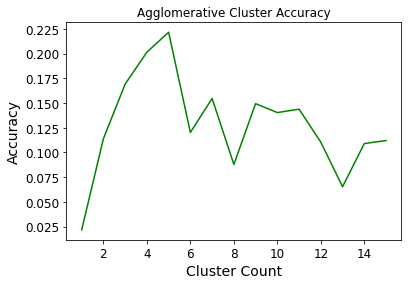

In [8]:
# Produce accuracy graph
x = np.arange(1, len(accuracyValues)+1)

plt.title("Agglomerative Cluster Accuracy")
plt.xlabel("Cluster Count")
plt.ylabel("Accuracy")
plt.plot(x, accuracyValues, color ="green")
plt.show()